In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('dataset/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [53]:
# we are going to use  iloc to select specific columns..or features...
df = df.iloc[: , 2:]


In [54]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [55]:
df.sample(5)

,Age,EstimatedSalary,Purchased
173,34,43000,0
352,42,90000,1
291,49,89000,1
253,37,146000,1
121,37,72000,0


In [56]:
# Train test split
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(df.drop('Purchased' , axis=1),df['Purchased'], test_size=0.3, random_state=0)



In [57]:
x_train.shape


(280, 2)

In [58]:
x_test.shape

(120, 2)

In [59]:
# StandarDScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(x_train)
scalar.fit(x_test)

x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [60]:
scalar.mean_

array([3.71666667e+01, 6.95916667e+04])

In [61]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [62]:
x_train_scaled

array([[-1.00978765, -1.66457226],
       [ 2.06478966,  0.98817303],
       [ 0.07535729,  1.29308628],
       [ 0.25621478,  1.14062966],
       [ 0.43707226, -0.5059019 ],
       [-0.19592895, -0.32295395],
       [ 0.97964473, -0.87179781],
       [ 0.97964473,  1.96389544],
       [ 0.07535729,  1.32357761],
       [-0.73850141,  2.39077399],
       [-1.00978765, -1.66457226],
       [ 2.06478966, -0.84130648],
       [-1.19064513, -1.54260696],
       [ 0.43707226,  2.42126531],
       [ 0.79878724,  0.80522508],
       [-0.82893016, -0.32295395],
       [ 0.16578603,  0.80522508],
       [-0.82893016,  0.5917858 ],
       [ 0.34664352,  0.07343327],
       [ 0.7083585 , -1.32916768],
       [-0.37678643, -0.0180407 ],
       [-1.55236011,  0.37834653],
       [-0.55764392,  0.13441593],
       [ 0.43707226,  0.31736388],
       [-0.19592895,  0.07343327],
       [-0.37678643,  2.42126531],
       [ 0.25621478,  0.04294195],
       [ 1.25093096,  2.32979134],
       [ 0.79878724,

In [63]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [64]:
x_train_scaled

,Age,EstimatedSalary
0,-1.009788,-1.664572
1,2.064790,0.988173
2,0.075357,1.293086
3,0.256215,1.140630
4,0.437072,-0.505902
...,...,...
275,0.979645,-1.207202
276,-0.738501,-0.810815
277,-0.105500,-0.536393
278,-0.919359,-0.475411


In [65]:
x_test_scaled

,Age,EstimatedSalary
0,-0.648073,0.530803
1,0.075357,-0.597376
2,-0.195929,0.164907
3,-0.648073,0.286873
4,-0.195929,-0.597376
...,...,...
115,1.070073,-0.140006
116,0.708358,1.872421
117,-0.557644,0.591786
118,0.798787,0.378347


In [66]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [67]:
np.round(x_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


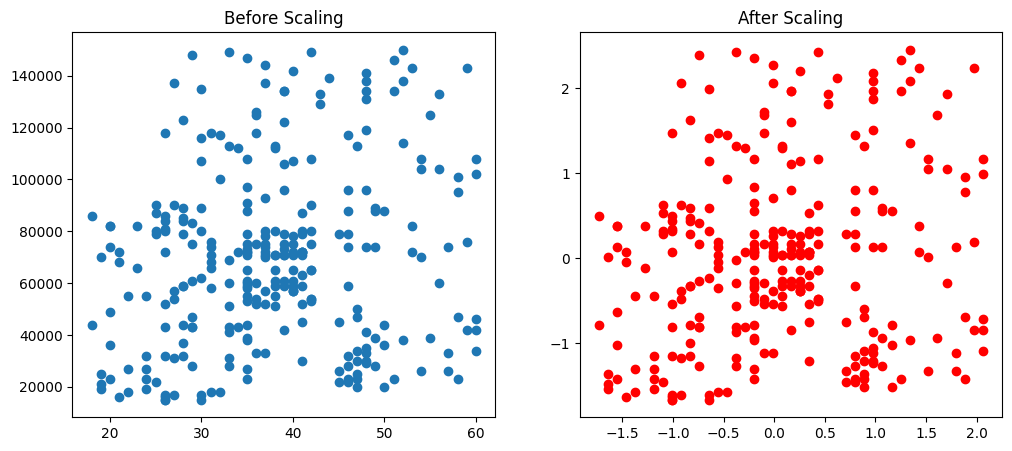

In [68]:
# Effect of Scaling
fig , (ax1, ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.scatter(x_train['Age'] , x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'] , x_train_scaled['EstimatedSalary'] , color='red')
ax2.set_title('After Scaling')
plt.show()

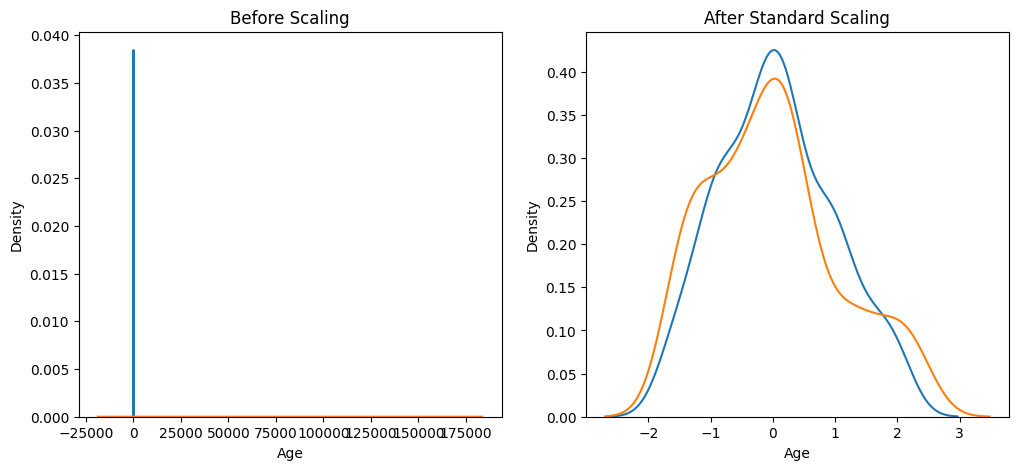

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

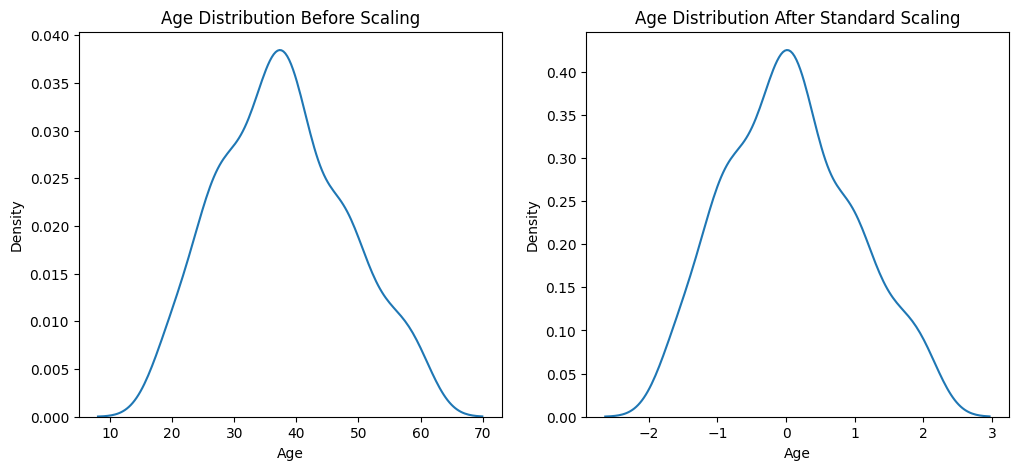

In [70]:
# Comparison of Distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

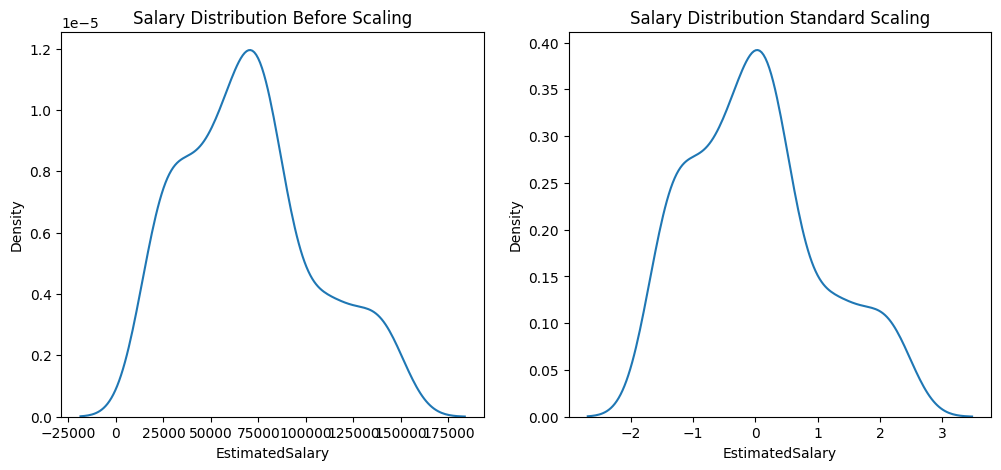

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [72]:
# Why Scaling is important?
# Scaling helps to increase accuracy of prediction. 

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [75]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [77]:

from sklearn.metrics import accuracy_score

In [78]:

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [81]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [83]:

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [84]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [85]:
# Effect of Outlier
new_data = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
df = pd.concat([df, new_data], ignore_index=True)

In [86]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


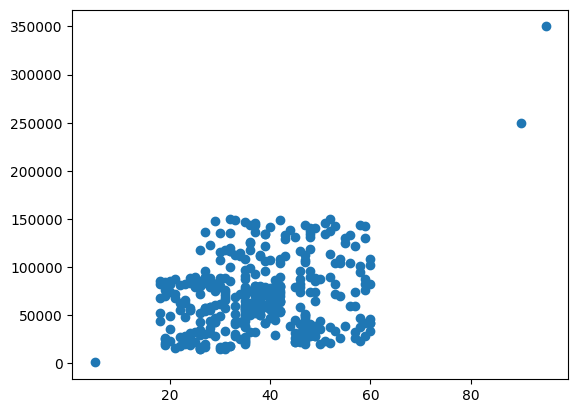

In [87]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


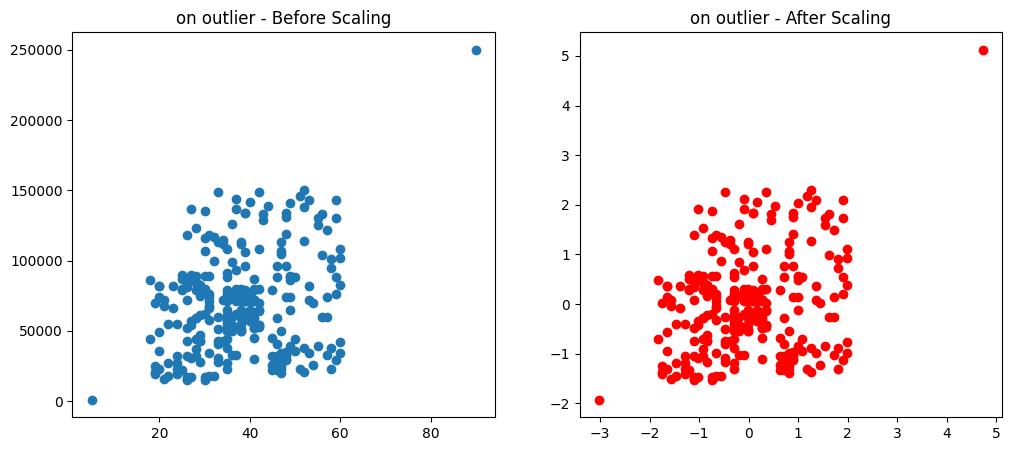

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("on outlier - Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("on outlier - After Scaling")
plt.show()
